In [1]:
import pandas as pd
import numpy as np
import math
##############################
from scipy.stats import *
from sympy.stats import *
##############################
import matplotlib.pyplot as plt
from matplotlib.dates import AutoDateFormatter, AutoDateLocator, date2num
import matplotlib
import seaborn as sns
import folium

In [2]:
import os
path = "C:/Users/Lenovo/Birzha/data"
dir_list = os.listdir(path)
dir_list = dir_list[1:12]

### Выполним загрузку данных в один большой датасет, для удобства работы
#### Для наглядности уберем ненужные символы в названии индексов, которые возникли при парсинге.

In [3]:
main_dataframe = pd.DataFrame(pd.read_csv(dir_list[0]))
main_dataframe

ticker        date        close    raw_close         high          low   
0     ^AXJO  2002-12-02  3083.800049  3083.800049  3083.800049  3056.000000  \
1     ^AXJO  2002-12-03  3072.600098  3072.600098  3083.800049  3059.699951   
2     ^AXJO  2002-12-04  3027.199951  3027.199951  3072.600098  3022.600098   
3     ^AXJO  2002-12-05  3040.500000  3040.500000  3048.800049  3026.899902   
4     ^AXJO  2002-12-06  3027.300049  3027.300049  3040.500000  3017.199951   
...     ...         ...          ...          ...          ...          ...   
4840  ^AXJO  2022-01-27  6838.299805  6838.299805  7042.799805  6758.200195   
4841  ^AXJO  2022-01-28  6988.100098  6988.100098  7000.000000  6837.899902   
4842  ^AXJO  2022-01-31  6971.600098  6971.600098  7004.399902  6932.700195   
4843  ^AXJO  2022-02-01  7006.000000  7006.000000  7043.600098  6945.700195   
4844  ^AXJO  2022-02-02  7087.700195  7087.700195  7107.200195  7006.000000   

             open     volume  
0     3061.399902        0.0  
1     3083.800049        0.0  
2     3072.600098        0.0  
3     3027.199951        0.0  
4     3040.500000        0.0  
...           ...        ...  
4840  6971.100098  1178700.0  
4841  6865.399902  2091100.0  
4842  6988.100098   759100.0  
4843  6971.600098   685800.0  
4844  7006.000000        0.0  

[4845 rows x 8 columns]

In [4]:
main_dataframe = pd.DataFrame(pd.read_csv(dir_list[0]))
for i in dir_list[1:]:
    data = pd.read_csv(i)
    df = pd.DataFrame(data)
    main_dataframe = pd.concat([main_dataframe,df],ignore_index = True)
main_dataframe['ticker'] = main_dataframe['ticker'].str.replace(r'^', '')

### Первый взгляд на данные:

In [5]:
main_dataframe

ticker        date        close    raw_close         high   
0           AXJO  2002-12-02  3083.800049  3083.800049  3083.800049  \
1           AXJO  2002-12-03  3072.600098  3072.600098  3083.800049   
2           AXJO  2002-12-04  3027.199951  3027.199951  3072.600098   
3           AXJO  2002-12-05  3040.500000  3040.500000  3048.800049   
4           AXJO  2002-12-06  3027.300049  3027.300049  3040.500000   
...          ...         ...          ...          ...          ...   
52767  000001.SS  2022-01-24  3524.110107  3524.110107  3531.610107   
52768  000001.SS  2022-01-25  3433.061279  3433.061279  3519.833496   
52769  000001.SS  2022-01-26  3455.669922  3455.669922  3462.123291   
52770  000001.SS  2022-01-27  3394.250000  3394.250000  3456.363037   
52771  000001.SS  2022-01-28  3361.439941  3361.439941  3417.050049   

               low         open        volume  
0      3056.000000  3061.399902  0.000000e+00  
1      3059.699951  3083.800049  0.000000e+00  
2      3022.600098  3072.600098  0.000000e+00  
3      3026.899902  3027.199951  0.000000e+00  
4      3017.199951  3040.500000  0.000000e+00  
...            ...          ...           ...  
52767  3500.139893  3508.244141  2.257030e+09  
52768  3433.061279  3509.284668  2.670610e+09  
52769  3417.760010  3442.691650  1.742479e+09  
52770  3392.020020  3456.102051  2.290850e+09  
52771  3356.560059  3407.593262  3.315722e+09  

[52772 rows x 8 columns]

In [6]:
main_dataframe.shape == main_dataframe[main_dataframe['raw_close']== main_dataframe['close']].shape

True

### Уберем избыточный признак raw_close, т.к он равен признаку close на всем датасете.

In [7]:
main_dataframe = main_dataframe.drop(['raw_close'],axis = 1)

In [8]:
main_dataframe

ticker        date        close         high          low   
0           AXJO  2002-12-02  3083.800049  3083.800049  3056.000000  \
1           AXJO  2002-12-03  3072.600098  3083.800049  3059.699951   
2           AXJO  2002-12-04  3027.199951  3072.600098  3022.600098   
3           AXJO  2002-12-05  3040.500000  3048.800049  3026.899902   
4           AXJO  2002-12-06  3027.300049  3040.500000  3017.199951   
...          ...         ...          ...          ...          ...   
52767  000001.SS  2022-01-24  3524.110107  3531.610107  3500.139893   
52768  000001.SS  2022-01-25  3433.061279  3519.833496  3433.061279   
52769  000001.SS  2022-01-26  3455.669922  3462.123291  3417.760010   
52770  000001.SS  2022-01-27  3394.250000  3456.363037  3392.020020   
52771  000001.SS  2022-01-28  3361.439941  3417.050049  3356.560059   

              open        volume  
0      3061.399902  0.000000e+00  
1      3083.800049  0.000000e+00  
2      3072.600098  0.000000e+00  
3      3027.199951  0.000000e+00  
4      3040.500000  0.000000e+00  
...            ...           ...  
52767  3508.244141  2.257030e+09  
52768  3509.284668  2.670610e+09  
52769  3442.691650  1.742479e+09  
52770  3456.102051  2.290850e+09  
52771  3407.593262  3.315722e+09  

[52772 rows x 7 columns]

### Опишем что означает каждый признак

In [9]:
features = pd.DataFrame(np.array(['Биржа','Дата','Цена закрытия','Наиболее высокая цена',
                      'Наименее низкая цена','Цена открытия','Объем торгов']),main_dataframe.columns)
features

0
ticker                  Биржа
date                     Дата
close           Цена закрытия
high    Наиболее высокая цена
low      Наименее низкая цена
open            Цена открытия
volume           Объем торгов

In [10]:
name = np.unique(main_dataframe['ticker'].values)
name

array(['000001.SS', 'AXJO', 'DJI', 'FCHI', 'GDAXI', 'GSPTSE', 'MERV',
       'N225', 'NYA', 'VIX', 'XAX'], dtype=object)

### Описание аббревиатуры каждого индекса бирж:

In [11]:
name_stock = np.array(['Шанхайская фондовая биржа','Австралийская фондовая биржа',
              'Индекс Доу Джонсона(Американская фондовая биржа)','Французская фондовая биржа',
              'Немецкая фондовая биржа','Канадская фондовая биржа',
              'Аргентинская фондовая биржа','Японская фондовая биржа',
              'Нью-Йорская фондовая биржа','(Индекс волатильности)Чикагская фондовая биржа','Американская фондовая биржа'])

In [12]:
abbreviation = pd.DataFrame({'Индекс': name, 'Расшифровка': name_stock})
abbreviation

Индекс                                       Расшифровка
0   000001.SS                         Шанхайская фондовая биржа
1        AXJO                      Австралийская фондовая биржа
2         DJI  Индекс Доу Джонсона(Американская фондовая биржа)
3        FCHI                        Французская фондовая биржа
4       GDAXI                           Немецкая фондовая биржа
5      GSPTSE                          Канадская фондовая биржа
6        MERV                       Аргентинская фондовая биржа
7        N225                           Японская фондовая биржа
8         NYA                        Нью-Йорская фондовая биржа
9         VIX    (Индекс волатильности)Чикагская фондовая биржа
10        XAX                       Американская фондовая биржа

In [13]:
main_dataframe['date'] = pd.to_datetime(main_dataframe['date'])

In [14]:
main_dataframe.info

<bound method DataFrame.info of           ticker       date        close         high          low   
0           AXJO 2002-12-02  3083.800049  3083.800049  3056.000000  \
1           AXJO 2002-12-03  3072.600098  3083.800049  3059.699951   
2           AXJO 2002-12-04  3027.199951  3072.600098  3022.600098   
3           AXJO 2002-12-05  3040.500000  3048.800049  3026.899902   
4           AXJO 2002-12-06  3027.300049  3040.500000  3017.199951   
...          ...        ...          ...          ...          ...   
52767  000001.SS 2022-01-24  3524.110107  3531.610107  3500.139893   
52768  000001.SS 2022-01-25  3433.061279  3519.833496  3433.061279   
52769  000001.SS 2022-01-26  3455.669922  3462.123291  3417.760010   
52770  000001.SS 2022-01-27  3394.250000  3456.363037  3392.020020   
52771  000001.SS 2022-01-28  3361.439941  3417.050049  3356.560059   

              open        volume  
0      3061.399902  0.000000e+00  
1      3083.800049  0.000000e+00  
2      3072.600098  0.

### Описательная статистика датасета по цене открытия:

In [15]:
main_dataframe.groupby(['ticker'])['open'].describe()

count          mean           std          min           25%   
ticker                                                                     
000001.SS  4652.0   2650.704335    895.017977  1007.901001   2046.246460  \
AXJO       4845.0   5134.227824   1073.727534  2700.399902   4392.399902   
DJI        4827.0  16450.701288   7209.928399  6547.009766  10772.850098   
FCHI       4904.0   4494.423712    962.277688  2453.050049   3728.677429   
GDAXI      4863.0   8394.616205   3439.766921  2203.969971   5714.515137   
GSPTSE     4815.0  13187.770302   3083.541472  6265.299805  11596.149902   
MERV       4691.0  13414.565277  18504.279083   469.690002   1769.739990   
N225       4694.0  15655.159785   5703.753264  7059.770020  10509.337402   
NYA        4827.0   9595.168379   2830.648063  4226.310059   7390.969971   
VIX        4827.0     19.255631      8.912191     9.010000     13.460000   
XAX        4827.0   2133.154705    535.926322   803.539978   1844.940002   

                    50%           75%           max  
ticker                                               
000001.SS   2765.309570   3206.146729   6057.428223  
AXJO        5187.299805   5872.899902   7629.000000  
DJI        13361.230469  20866.044922  36722.601562  
FCHI        4430.270020   5226.869995   7320.479980  
GDAXI       7576.009766  11471.030273  16269.219727  
GSPTSE     13313.900391  15201.450195  21758.099609  
MERV        3172.560059  20397.294922  96045.609375  
N225       15284.714844  19793.462891  30606.150391  
NYA         9306.469727  11324.405273  17353.800781  
VIX           16.690001     22.095000     82.690002  
XAX         2286.800049   2456.724976   3707.919922

### Описательная статистика датасета по цене закрытия:

In [16]:
main_dataframe.groupby(['ticker'])['close'].describe()

count          mean           std          min           25%   
ticker                                                                     
000001.SS  4652.0   2653.361403    895.543237  1011.499023   2048.222687  \
AXJO       4845.0   5134.684066   1073.586286  2700.399902   4387.000000   
DJI        4827.0  16455.099396   7212.593198  6547.049805  10775.245117   
FCHI       4904.0   4493.794143    963.126826  2403.040039   3729.345093   
GDAXI      4863.0   8394.339289   3439.122733  2202.959961   5709.199951   
GSPTSE     4815.0  13185.512178   3084.102479  6228.600098  11584.200195   
MERV       4691.0  13431.856118  18538.251322   469.690002   1767.690002   
N225       4694.0  15652.088087   5703.358148  7054.979980  10504.659912   
NYA        4827.0   9596.831340   2831.975689  4226.310059   7392.975098   
VIX        4827.0     19.139666      8.867692     9.140000     13.370000   
XAX        4827.0   2133.687705    536.203978   803.539978   1842.075012   

                    50%           75%           max  
ticker                                               
000001.SS   2770.450073   3210.133606   6092.057129  
AXJO        5186.799805   5872.700195   7628.899902  
DJI        13365.870117  20856.959961  36841.800781  
FCHI        4427.260010   5225.360107   7376.370117  
GDAXI       7583.569824  11472.325195  16271.750000  
GSPTSE     13318.000000  15201.449707  21774.189453  
MERV        3176.360107  20537.535156  96044.882812  
N225       15288.029785  19811.708008  30670.099609  
NYA         9302.799805  11294.689941  17353.759766  
VIX           16.629999     21.845000     82.690002  
XAX         2287.179932   2456.630005   3707.919922

### Описательная статистика датасета по объему торгов:

In [17]:
main_dataframe.groupby(['ticker'])['volume'].describe()

count          mean           std        min           25%   
ticker                                                                   
000001.SS  4652.0  4.939772e+07  3.724758e+08        0.0  5.520000e+04  \
AXJO       4845.0  4.558736e+07  1.648769e+08        0.0  0.000000e+00   
DJI        4827.0  2.337947e+08  1.174506e+08  8410000.0  1.422050e+08   
FCHI       4904.0  1.054293e+08  5.955937e+07        0.0  7.536348e+07   
GDAXI      4863.0  1.108544e+08  4.910293e+07        0.0  8.003515e+07   
GSPTSE     4815.0  1.939185e+10  7.787511e+09        0.0  1.517020e+10   
MERV       4691.0  3.709230e+00  2.540484e+02        0.0  0.000000e+00   
N225       4694.0  1.185818e+08  5.220726e+07        0.0  7.850000e+07   
NYA        4827.0  3.495186e+09  1.406057e+09        0.0  2.691295e+09   
VIX        4827.0  0.000000e+00  0.000000e+00        0.0  0.000000e+00   
XAX        4827.0  2.427754e+05  4.895624e+05        0.0  0.000000e+00   

                    50%           75%           max  
ticker                                               
000001.SS  1.144000e+05  1.906000e+05  4.279932e+09  
AXJO       0.000000e+00  0.000000e+00  1.353735e+09  
DJI        2.241300e+08  2.956100e+08  9.159900e+08  
FCHI       1.021955e+08  1.372606e+08  5.312476e+08  
GDAXI      1.003286e+08  1.291752e+08  4.940122e+08  
GSPTSE     1.895798e+10  2.281104e+10  9.440374e+10  
MERV       0.000000e+00  0.000000e+00  1.740000e+04  
N225       1.142500e+08  1.460000e+08  5.952000e+08  
NYA        3.468210e+09  4.159385e+09  1.145623e+10  
VIX        0.000000e+00  0.000000e+00  0.000000e+00  
XAX        0.000000e+00  4.381500e+05  9.167400e+06

### Посмотрим на выбросы в данных

In [18]:
def feature_boxplot(feature):
    fig, ax = plt.subplots(figsize = (25,18), nrows = 3, ncols = 4)
    row, col,n = 0,0,4
    for i in name:
        sns.boxplot(x = main_dataframe[main_dataframe['ticker']==i][feature],
                             color = 'blue',
                             ax = ax[row,col])
        ax[row, col].set_title(i, fontsize = 14)
        col = col + 1
        if col == n:
            col = 0
            row = row + 1

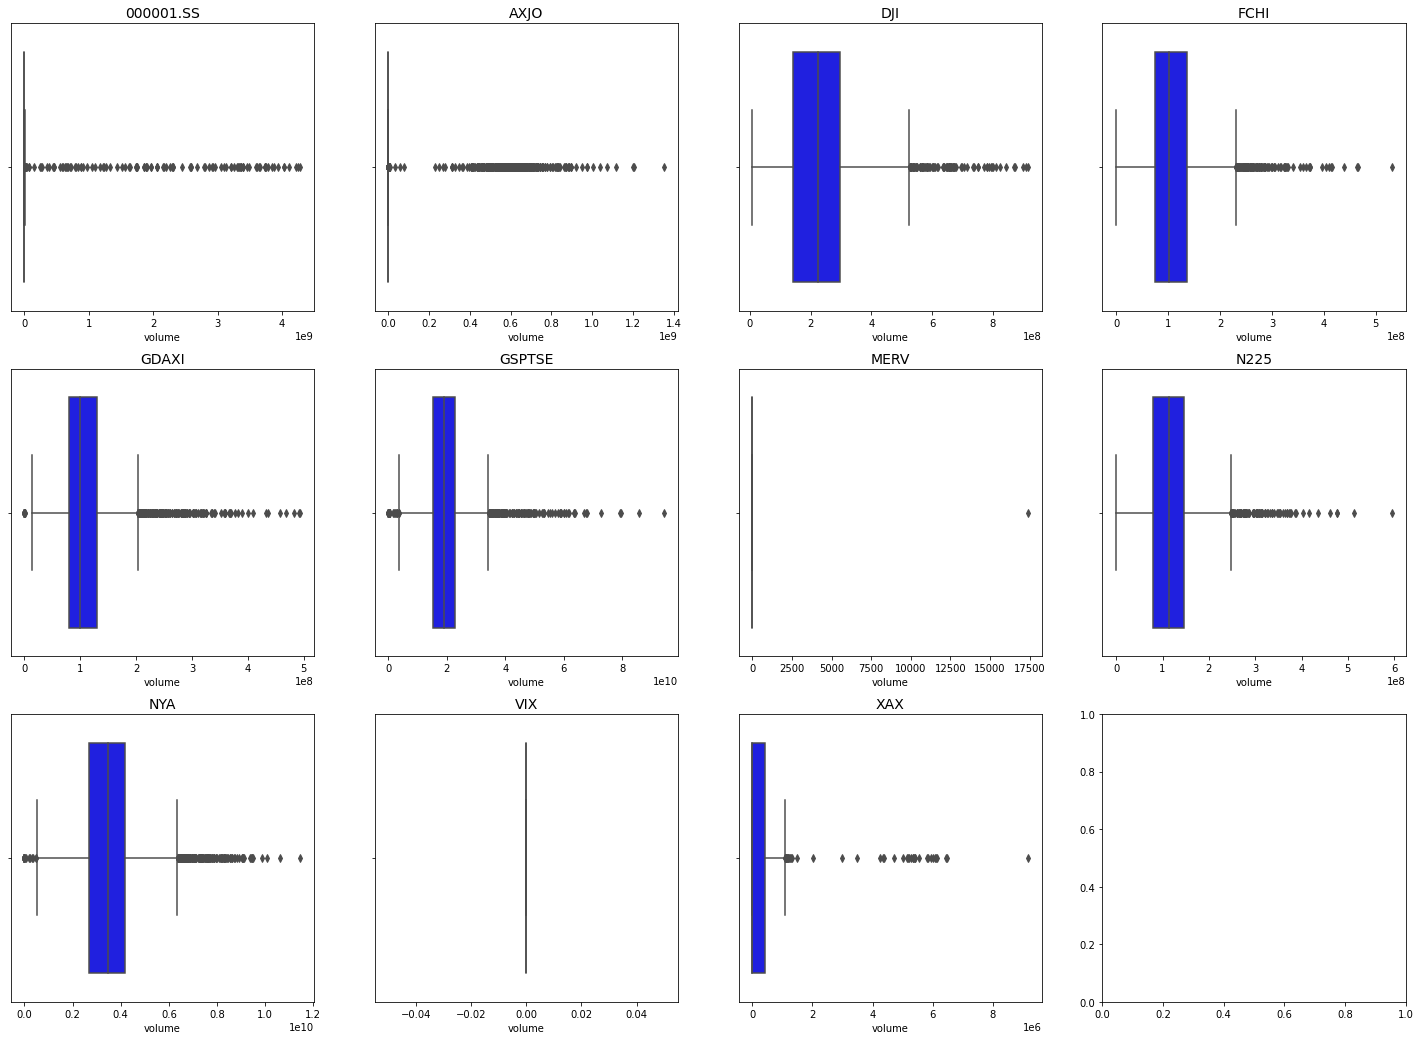

In [19]:
feature_boxplot('volume')

### Можем заметить значительные выбросы во всех биржах по объему торгов, также сразу можем понять что на бирже VIX объемы отсутствуют, что соответствует здравому смыслу, так как этот индекс показывает общую волатильность фондовогго рынка и является своего рода индикатором поведения рынка.

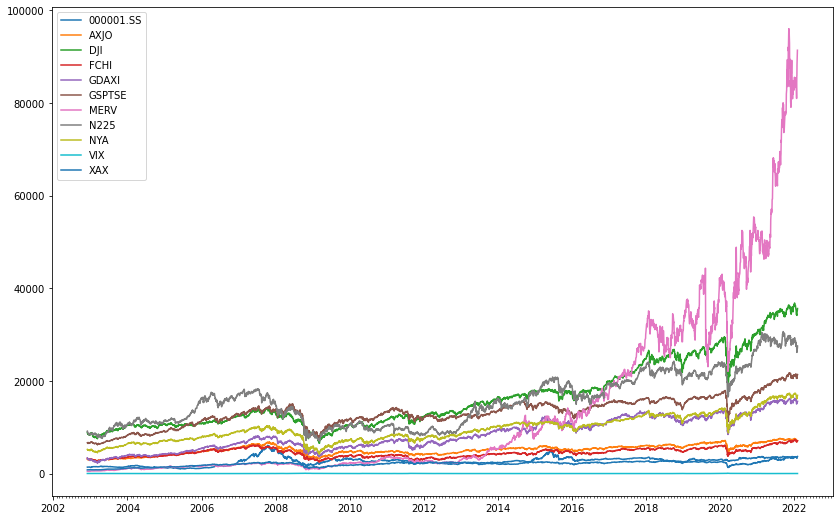

In [20]:
fig, ax = plt.subplots(figsize=(14, 9)) 
xtick_locator =  matplotlib.dates.MonthLocator()
x2_locator = matplotlib.dates.YearLocator(2, month=1, day=1)
ax.plot(main_dataframe[main_dataframe['ticker']=='000001.SS']['date'].values,
         main_dataframe[main_dataframe['ticker']=='000001.SS']['close'].values)
ax.plot(main_dataframe[main_dataframe['ticker']=='AXJO']['date'].values,
         main_dataframe[main_dataframe['ticker']=='AXJO']['close'].values)
ax.plot(main_dataframe[main_dataframe['ticker']=='DJI']['date'].values,
         main_dataframe[main_dataframe['ticker']=='DJI']['close'].values)
ax.plot(main_dataframe[main_dataframe['ticker']=='FCHI']['date'].values,
         main_dataframe[main_dataframe['ticker']=='FCHI']['close'].values)
ax.plot(main_dataframe[main_dataframe['ticker']=='GDAXI']['date'].values,
         main_dataframe[main_dataframe['ticker']=='GDAXI']['close'].values)
ax.plot(main_dataframe[main_dataframe['ticker']=='GSPTSE']['date'].values,
         main_dataframe[main_dataframe['ticker']=='GSPTSE']['close'].values)
ax.plot(main_dataframe[main_dataframe['ticker']=='MERV']['date'].values,
         main_dataframe[main_dataframe['ticker']=='MERV']['close'].values)
ax.plot(main_dataframe[main_dataframe['ticker']=='N225']['date'].values,
         main_dataframe[main_dataframe['ticker']=='N225']['close'].values)
ax.plot(main_dataframe[main_dataframe['ticker']=='NYA']['date'].values,
         main_dataframe[main_dataframe['ticker']=='NYA']['close'].values)
ax.plot(main_dataframe[main_dataframe['ticker']=='VIX']['date'].values,
         main_dataframe[main_dataframe['ticker']=='VIX']['close'].values)
ax.plot(main_dataframe[main_dataframe['ticker']=='XAX']['date'].values,
         main_dataframe[main_dataframe['ticker']=='XAX']['close'].values)
ax.xaxis.set_minor_locator(xtick_locator)
ax.xaxis.set_major_locator(x2_locator)
ax.legend(list(name))

### Посмотрев на графики цен открытия/закрытия мы можем увидеть взаимосвязь между индексами разных бирж, а также резкие скачки и падения в определенные периоды времени.

### Построим распределения цен открытия и закрытия:

In [21]:
name

array(['000001.SS', 'AXJO', 'DJI', 'FCHI', 'GDAXI', 'GSPTSE', 'MERV',
       'N225', 'NYA', 'VIX', 'XAX'], dtype=object)

In [22]:
main_dataframe[main_dataframe['ticker']=='000001.SS']['open'].values

array([1432.02905273, 1391.71801758, 1414.88696289, ..., 3442.69165039,
       3456.10205078, 3407.59326172])

In [23]:
def feature_dens(feature):
    fig, ax = plt.subplots(figsize = (26,18), nrows = 3, ncols = 4)
    row, col,n = 0,0,4
    for i in name:
        sns.histplot(main_dataframe[main_dataframe['ticker']==i][feature].values,
                             kde = True,
                             color = 'blue',
                             ax = ax[row,col])
        ax[row, col].set_title(i, fontsize = 13)
        col = col + 1
        if col == n:
            col = 0
            row = row + 1

In [24]:
#!pip install --user --upgrade matplotlib

### Цена открытия:

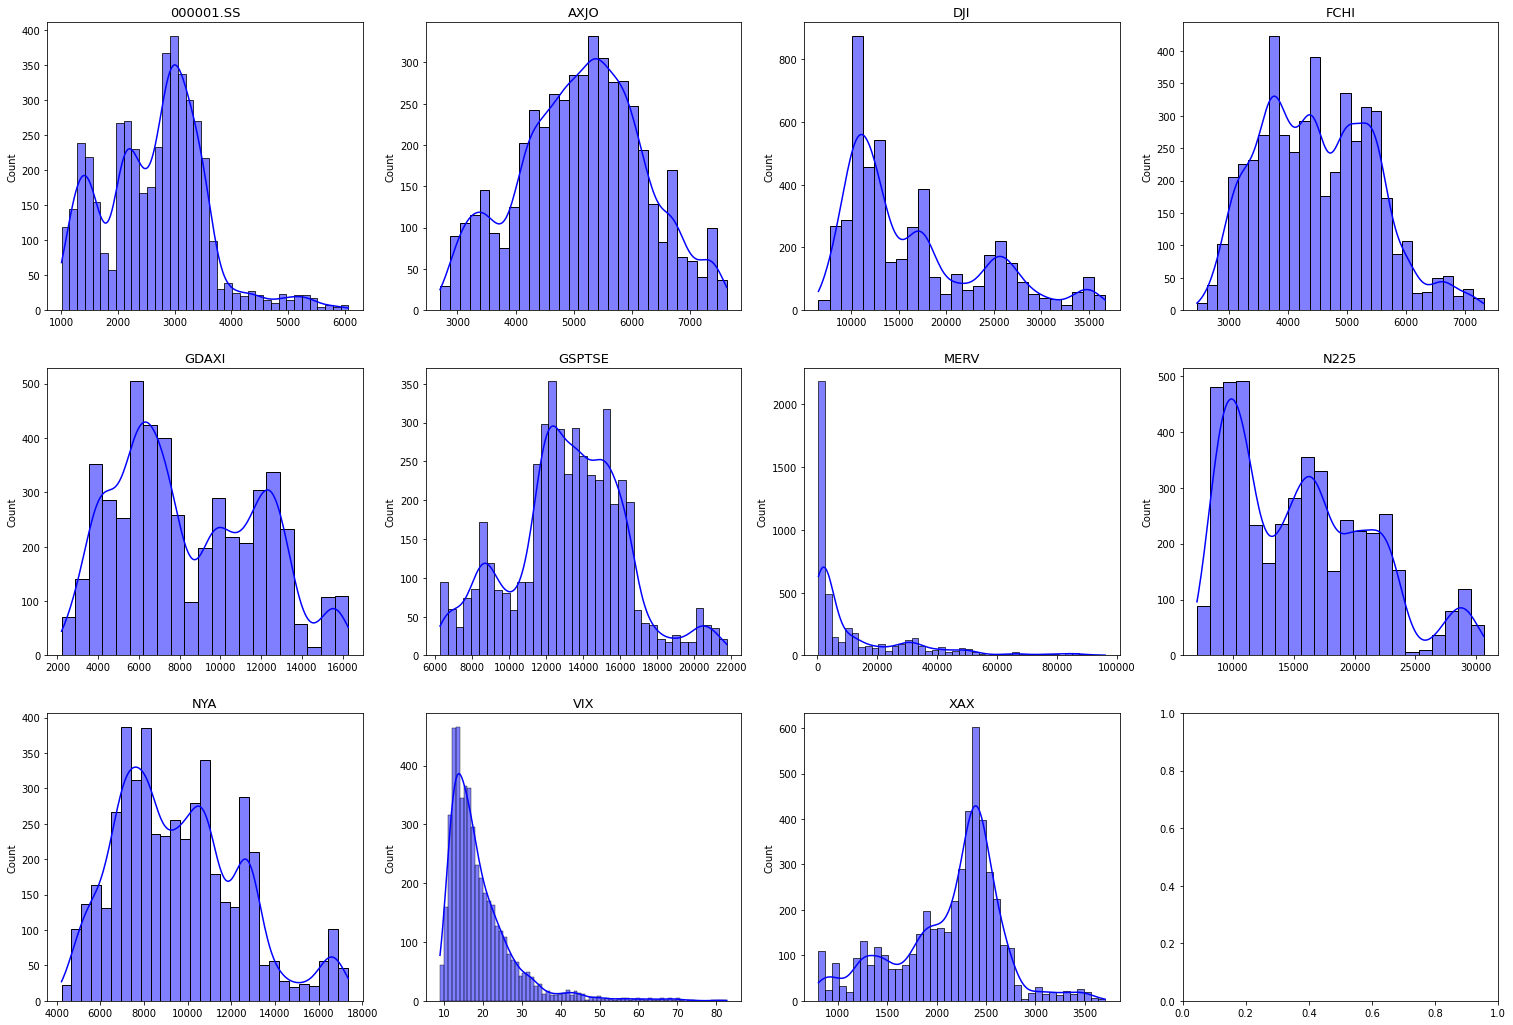

In [25]:
feature_dens('open')

### Цена закрытия:

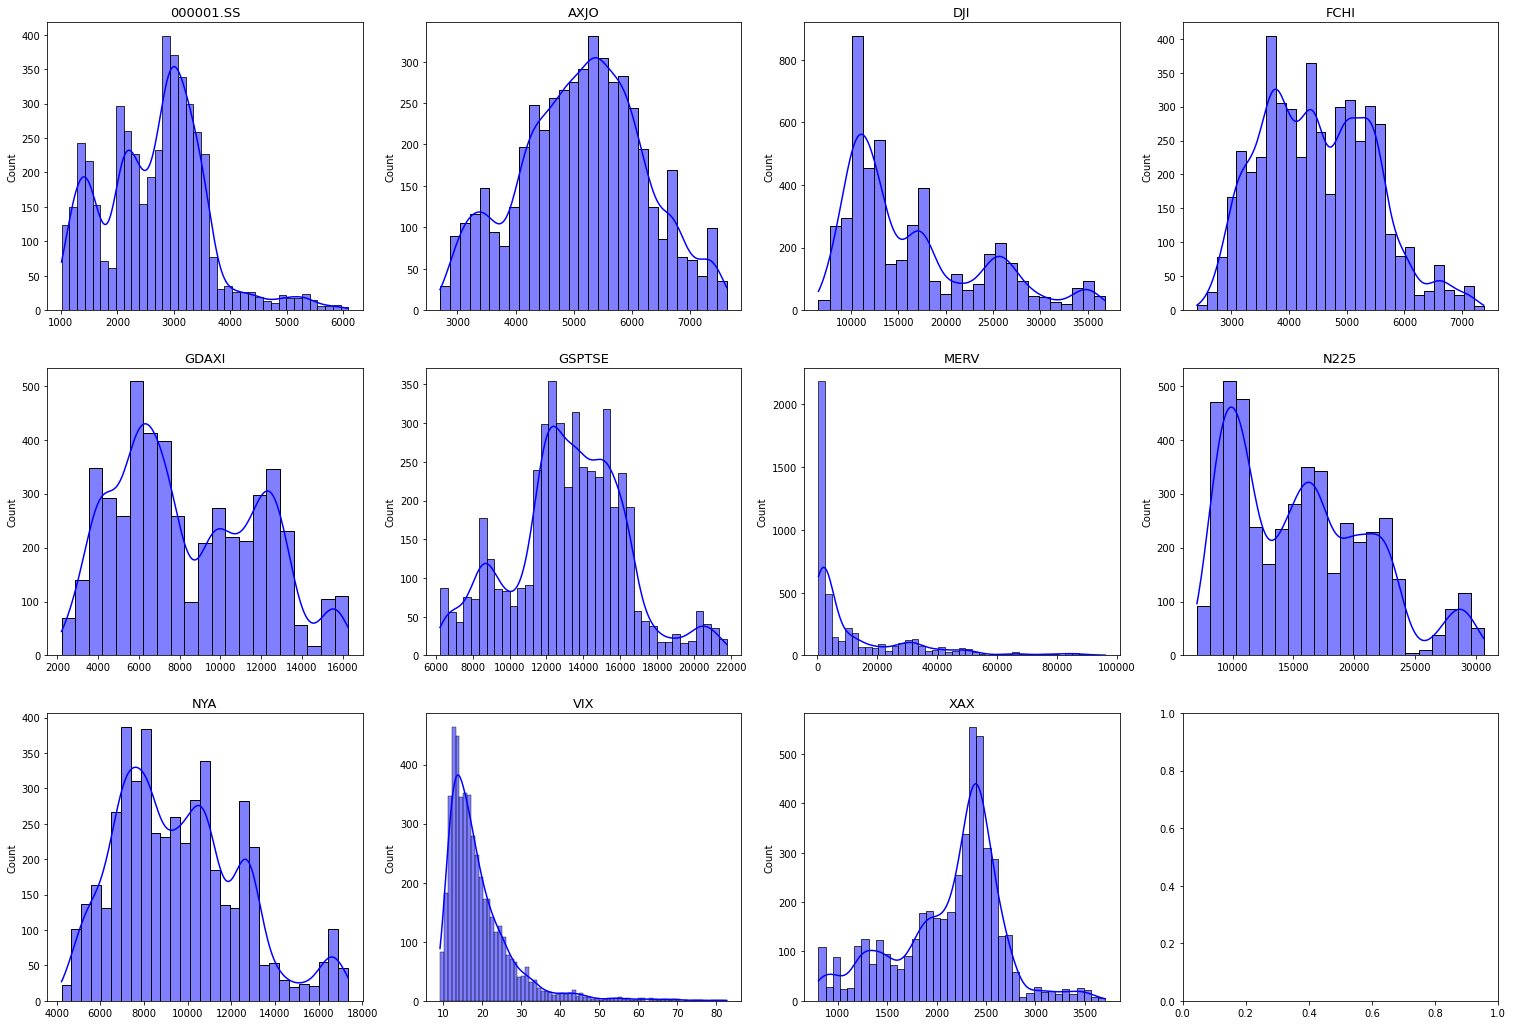

In [26]:
feature_dens('close')

### Взглянув на распределение признаков индексов бирж, можно сделать однозначный вывод о том что данные распределены не нормально, и четко распознать распределение каждого признака индекса бирж трудно. Стоит это учесть при дальнейшей проверке статистических гипотез, так как параметрические методы будут неприменимы к таким данным.

### Выведем матрицу коэффициентов корреляции между признаками внутри каждой биржи:

In [27]:
main_dataframe

ticker       date        close         high          low   
0           AXJO 2002-12-02  3083.800049  3083.800049  3056.000000  \
1           AXJO 2002-12-03  3072.600098  3083.800049  3059.699951   
2           AXJO 2002-12-04  3027.199951  3072.600098  3022.600098   
3           AXJO 2002-12-05  3040.500000  3048.800049  3026.899902   
4           AXJO 2002-12-06  3027.300049  3040.500000  3017.199951   
...          ...        ...          ...          ...          ...   
52767  000001.SS 2022-01-24  3524.110107  3531.610107  3500.139893   
52768  000001.SS 2022-01-25  3433.061279  3519.833496  3433.061279   
52769  000001.SS 2022-01-26  3455.669922  3462.123291  3417.760010   
52770  000001.SS 2022-01-27  3394.250000  3456.363037  3392.020020   
52771  000001.SS 2022-01-28  3361.439941  3417.050049  3356.560059   

              open        volume  
0      3061.399902  0.000000e+00  
1      3083.800049  0.000000e+00  
2      3072.600098  0.000000e+00  
3      3027.199951  0.000000e+00  
4      3040.500000  0.000000e+00  
...            ...           ...  
52767  3508.244141  2.257030e+09  
52768  3509.284668  2.670610e+09  
52769  3442.691650  1.742479e+09  
52770  3456.102051  2.290850e+09  
52771  3407.593262  3.315722e+09  

[52772 rows x 7 columns]

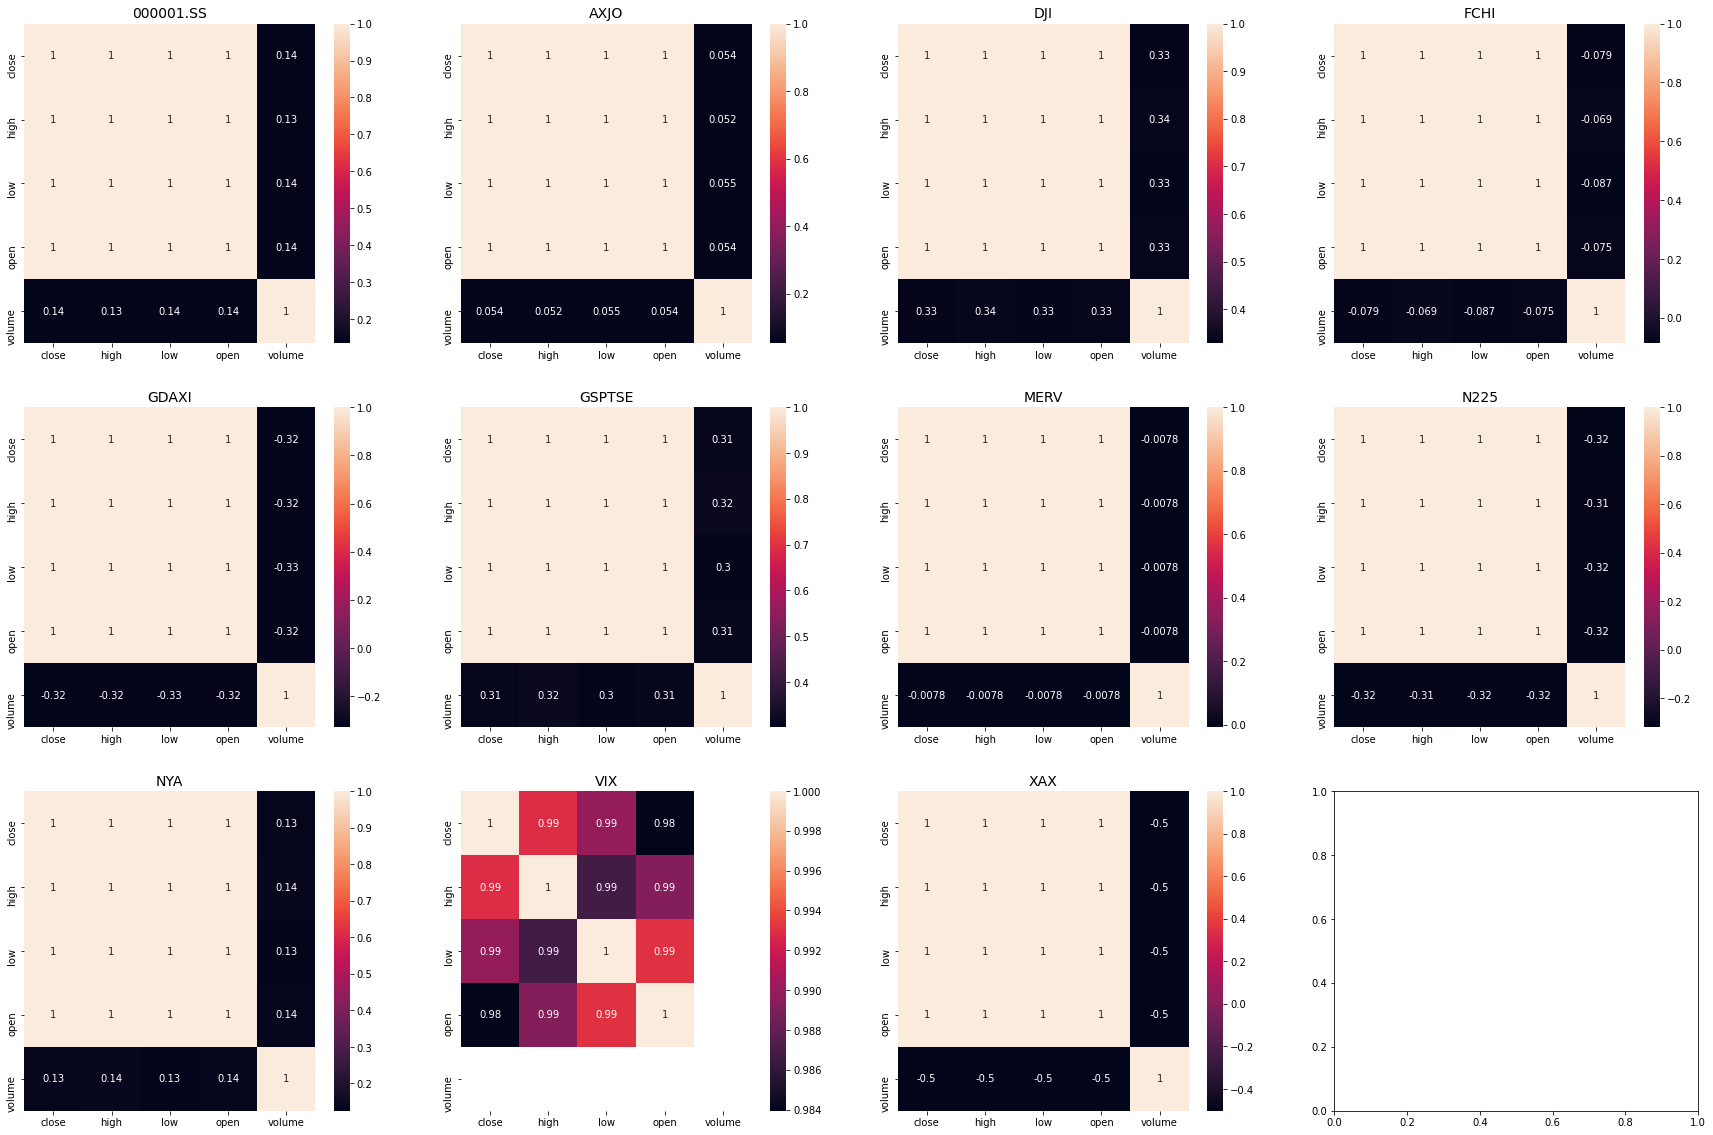

In [55]:
fig, ax = plt.subplots(figsize = (30,20), nrows = 3, ncols = 4)
row, col,n = 0,0,4
for i in name:
    sns.heatmap(main_dataframe[main_dataframe['ticker']==i].iloc[:,2:].corr(), 
                             annot=True,
                             ax = ax[row,col])
    ax[row, col].set_title(i, fontsize = 14)
    col = col + 1
    if col == n:
        col = 0
        row = row + 1

### Можем видеть что все признаки имеют сильную положительную корреляцию друг с другом, кроме признака volume. В некоторых индексах он имеет слабую отрицательную корреляцию.

### После подробного анализа и обработки данных, можно выдвигать гипотезы. Будут проверяться следующие статистические гипотезы:
**1. Гипотеза о влиянии объема торгов на цену закрытия биржи** \
**2. Равенство медианы цен открытия и закрытия биржи.**\
**3. Гипотеза о влиянии цены закрытия бирж друг на друга.**

### 1. Выдвинем и проверим гипотезу о влиянии объема торгов на цену закрытия биржи. 
**Отберем дни когда был маленький объем торгов и большой и сравним среднее в этих двух группах.\
Проверим статистически значимую разницу средней цены в дни с высоким объемом торгов и низким объемом торгов. Наша альтернативная гипотеза будет односторонняя и будет говорить нам о том что в дни с меньшим объемом торгов средняя цена закрытия была меньше чем в дни с большим объемом торгов.**

### $H_0: \mu_1 = \mu_2$
### $H_1: \mu_1 < \mu_2$

### Для проверки гипотезы будем использовать Mann-Whitney U-тест, для сравнения средних значений между двумя группами. 
**Выбор теста обоснован не нормальным распределением признака close.**

### Уберем индекс VIX и MERV из теста, так как в первом индексе отсутствуют торги, он отражает волатильность рынка, а индекс MERV в большей степени состоит из нулевых торгов, что тоже позволяет нам убрать из рассмотрения данный индекс для проведения гипотез.
**Также выберем ненулевые торги во всех оставшихся индексах, будем считать дни с большим объемом торгов где все значения объемов лежат ниже медианного значения(выбор данной величины обоснован устойчивостью медианы к выбросам, а также ненормальностью распределения признака volume).**

In [29]:
alpha = 0.05
con = []
p_list = []
h_list = []
l_list = []
df = main_dataframe[main_dataframe['volume'] > 0]
for stock in name[(name!='VIX') & (name!='MERV')]:
    high_volume = df[(df['ticker']==stock)
                             & (df['volume'] > df[df['ticker']==stock].volume.median())]
    h_list.append(high_volume[high_volume['ticker']==stock]['close'].mean())
    low_volume = df[(df['ticker']==stock) 
                            & (df['volume'] <= df[df['ticker']==stock].volume.median())]
    l_list.append(low_volume[low_volume['ticker']==stock]['close'].mean())
    statistic, p_value = mannwhitneyu(low_volume['close'], high_volume['close'], alternative="less")
    p_list.append(p_value)
    if p_value < alpha:
        con.append('H0 отвергается')
    else:
        con.append('H0 не отвергается')

Биржа        p_value              Вывод  Среднее в больших объемах   
0  000001.SS   0.000000e+00     H0 отвергается                3098.345364  \
1       AXJO   1.000000e+00  H0 не отвергается                5661.240455   
2        DJI   2.391292e-34     H0 отвергается               18794.556283   
3       FCHI   1.000000e+00  H0 не отвергается                4265.540495   
4      GDAXI   1.000000e+00  H0 не отвергается                7258.524085   
5     GSPTSE  2.309905e-110     H0 отвергается               14191.184873   
6       N225   1.000000e+00  H0 не отвергается               13823.643794   
7        NYA   5.136630e-09     H0 отвергается                9796.108837   
8        XAX   1.000000e+00  H0 не отвергается                1500.014405   

   Среднее в маленьких объемах  
0                  2238.740611  
1                  6732.737589  
2                 14116.611630  
3                  4940.184969  
4                  9512.983763  
5                 12185.348171  
6                 17443.383077  
7                  9397.636617  
8                  1937.048605

In [78]:
Hyp1 = pd.DataFrame({'Биржа': name[(name!='VIX') & (name!='MERV')],'p_value':p_list,
              'Вывод':con, 'Среднее в больших объемах':h_list, 'Среднее в маленьких объемах':l_list })

In [79]:
Hyp1

Биржа        p_value              Вывод  Среднее в больших объемах   
0  000001.SS   0.000000e+00     H0 отвергается                3098.345364  \
1       AXJO   1.000000e+00  H0 не отвергается                5661.240455   
2        DJI   2.391292e-34     H0 отвергается               18794.556283   
3       FCHI   1.000000e+00  H0 не отвергается                4265.540495   
4      GDAXI   1.000000e+00  H0 не отвергается                7258.524085   
5     GSPTSE  2.309905e-110     H0 отвергается               14191.184873   
6       N225   1.000000e+00  H0 не отвергается               13823.643794   
7        NYA   5.136630e-09     H0 отвергается                9796.108837   
8        XAX   1.000000e+00  H0 не отвергается                1500.014405   

   Среднее в маленьких объемах  
0                  2238.740611  
1                  6732.737589  
2                 14116.611630  
3                  4940.184969  
4                  9512.983763  
5                 12185.348171  
6                 17443.383077  
7                  9397.636617  
8                  1937.048605

### Вывод:
### При проверке гипотезы были обнаружены статистически значимые различия в биржах: 000001.SS, DJI, GSPTSE, NYA. В данных биржах можно сделать вывод о том что в дни когда объем торгов больше, цена закрытия будет больше в сравнении с днями с меньшим объемом торгов.

### Во всех остальных биржах не удалось обнаружить статистически значимых различий при уровне значимости 0,05. С вероятностью 95% можно делать вывод о том, что в дни с большим и маленьким объемом торгов, средние цены закрытия биржи не имеют статистически значимых различий между собой.

### 2. Гипотеза о равенстве медианного значения цен открытия и цен закрытия бирж.
**Выдвинем гипотезу о равенстве медианного значения цен открытия и закрытия бирж. Для оценки медианного значения по данным которые не подчиняются параметрическим методам воспользуемся бутсреп тестом.**

**Бутстрэп в статистике — практический компьютерный метод исследования распределения статистик вероятностных распределений, основанный на многократной генерации выборок методом Монте-Карло на базе имеющейся выборки. Позволяет просто и быстро оценивать самые разные статистики (доверительные интервалы, дисперсию, корреляцию и так далее) для сложных моделей.**

**Идея реализации:**\
**1. Расчитываем фактическую статистику как разницу медианных значений индекса открытия и закрытия**\
**2. Генерируем подвыборку из выборки индексов открытия и закрытия многократно с повторениями, тем самым мы моделируем поведение нашей статистики(медианного значения).**\
**3. Далее расчитываем разницу между каждым значением в двух выборках(цена открытия-цена закрытия) и рассчитываем на полученной выборке медиану.**\
**4. Строим доверительный интервал заданной вероятности и смотрим попадает ли фактическое значение нашей статистики в него или нет, на основании чего делаем вывод.**

### $H_0: Me_{open} = Me_{close}$
### $H_1: Me_{open} \neq Me_{close}$
### Уровень значимости $\alpha = 0.05$

In [30]:
def get_percentile_ci(bootstrap_stats, pe, alpha):
    """Строит перцентильный доверительный интервал."""
    left, right = np.quantile(bootstrap_stats, [alpha / 2, 1 - alpha / 2])
    return left, right

### Пример на бирже FCHI, как работает бутстреп-тест:

In [31]:
B = 10000
alpha = 0.05

opening_index = main_dataframe[main_dataframe['ticker'] == 'FCHI'].open.values
closing_index = main_dataframe[main_dataframe['ticker'] == 'FCHI'].close.values

pe = np.median(closing_index) - np.median(opening_index)

bootstrap_values_a = np.random.choice(opening_index, (B, len(opening_index)), True)
bootstrap_metrics_a = np.median(bootstrap_values_a, axis=1)
bootstrap_values_b = np.random.choice(closing_index, (B, len(closing_index)), True)
bootstrap_metrics_b = np.median(bootstrap_values_b, axis=1)
bootstrap_stats = bootstrap_metrics_b - bootstrap_metrics_a
ci = get_percentile_ci(bootstrap_stats, pe, alpha)
has_effect = not (ci[0] < 0 < ci[1])

print(f'Фактическое значение статистики: {pe:0.2f}')
print(f'{((1 - alpha) * 100)}% доверительный интервал: ({ci[0]:0.2f}, {ci[1]:0.2f})')
print(f'Отличия статистически значимые: {has_effect}')

Фактическое значение статистики: -3.01
95.0% доверительный интервал: (-39.05, 37.69)
Отличия статистически значимые: False


### Запустим бутстреп тест на всех биржах и выведем результат проверки гипотез.

**В данной функции аргументами являются уровень значимости alpha и количество извлеченных подвыборок**

In [32]:
def bootstrap_stock_mean(alpha, B = 2000):
    eff_list =[]
    pe_list = []
    for stock in name:
        opening_index = main_dataframe[main_dataframe['ticker'] == stock].open.values
        closing_index = main_dataframe[main_dataframe['ticker'] == stock].close.values

        pe = np.median(closing_index) - np.median(opening_index)
        bootstrap_values_a = np.random.choice(opening_index, (B, len(opening_index)), True)
        bootstrap_metrics_a = np.median(bootstrap_values_a, axis=1)
        bootstrap_values_b = np.random.choice(closing_index, (B, len(closing_index)), True)
        bootstrap_metrics_b = np.median(bootstrap_values_b, axis=1)
        bootstrap_stats = bootstrap_metrics_b - bootstrap_metrics_a
        ci = get_percentile_ci(bootstrap_stats, pe, alpha)
        has_effect = not (ci[0] < 0 < ci[1])
        if has_effect:
            has_effect = 'H0 отвергается'
        else:
            has_effect = 'H0 не отвергается'
        eff_list.append(has_effect)
        pe_list.append(pe)
    df = pd.DataFrame({'Биржа' : name, 'Значимость' : eff_list, 'Фактическое значение статистики': pe_list})
    return df

In [80]:
Hyp2 = bootstrap_stock_mean(0.05)

In [81]:
Hyp2

Биржа         Значимость  Фактическое значение статистики
0   000001.SS  H0 не отвергается                         5.140503
1        AXJO  H0 не отвергается                        -0.500000
2         DJI  H0 не отвергается                         4.639648
3        FCHI  H0 не отвергается                        -3.010010
4       GDAXI  H0 не отвергается                         7.560059
5      GSPTSE  H0 не отвергается                         4.099609
6        MERV  H0 не отвергается                         3.800049
7        N225  H0 не отвергается                         3.314941
8         NYA  H0 не отвергается                        -3.669922
9         VIX  H0 не отвергается                        -0.060001
10        XAX  H0 не отвергается                         0.379883

### Визуализируем наше поведение статистик в биржах для наглядности:

In [34]:
def plot_bootstrap_mean(name):
    fig, ax = plt.subplots(figsize = (27,20,), nrows = 3, ncols = 4)
    row, col,n = 0,0,4
    for stock in name:
        opening_index = main_dataframe[main_dataframe['ticker'] == stock].open.values
        closing_index = main_dataframe[main_dataframe['ticker'] == stock].close.values

        pe = np.median(closing_index) - np.median(opening_index)
        bootstrap_values_a = np.random.choice(opening_index, (B, len(opening_index)), True)
        bootstrap_metrics_a = np.median(bootstrap_values_a, axis=1)
        bootstrap_values_b = np.random.choice(closing_index, (B, len(closing_index)), True)
        bootstrap_metrics_b = np.median(bootstrap_values_b, axis=1)
        bootstrap_stats = bootstrap_metrics_b - bootstrap_metrics_a  
        ci = get_percentile_ci(bootstrap_stats, pe, alpha)
        
        ax[row, col].hist(bootstrap_stats, bins=30, edgecolor='k')
        ax[row, col].axvline(x=pe, color='r', linestyle='dashed', linewidth=2, label='Фактическая статистика')
        ax[row, col].set_title(stock, fontsize = 14)
        ax[row, col].plot(ci, [-11*2, -11*2], label='перцентильный ДИ', color = 'g', linewidth=4)
        ax[row, col].legend()
        col = col + 1
        if col == n:
            col = 0
            row = row + 1

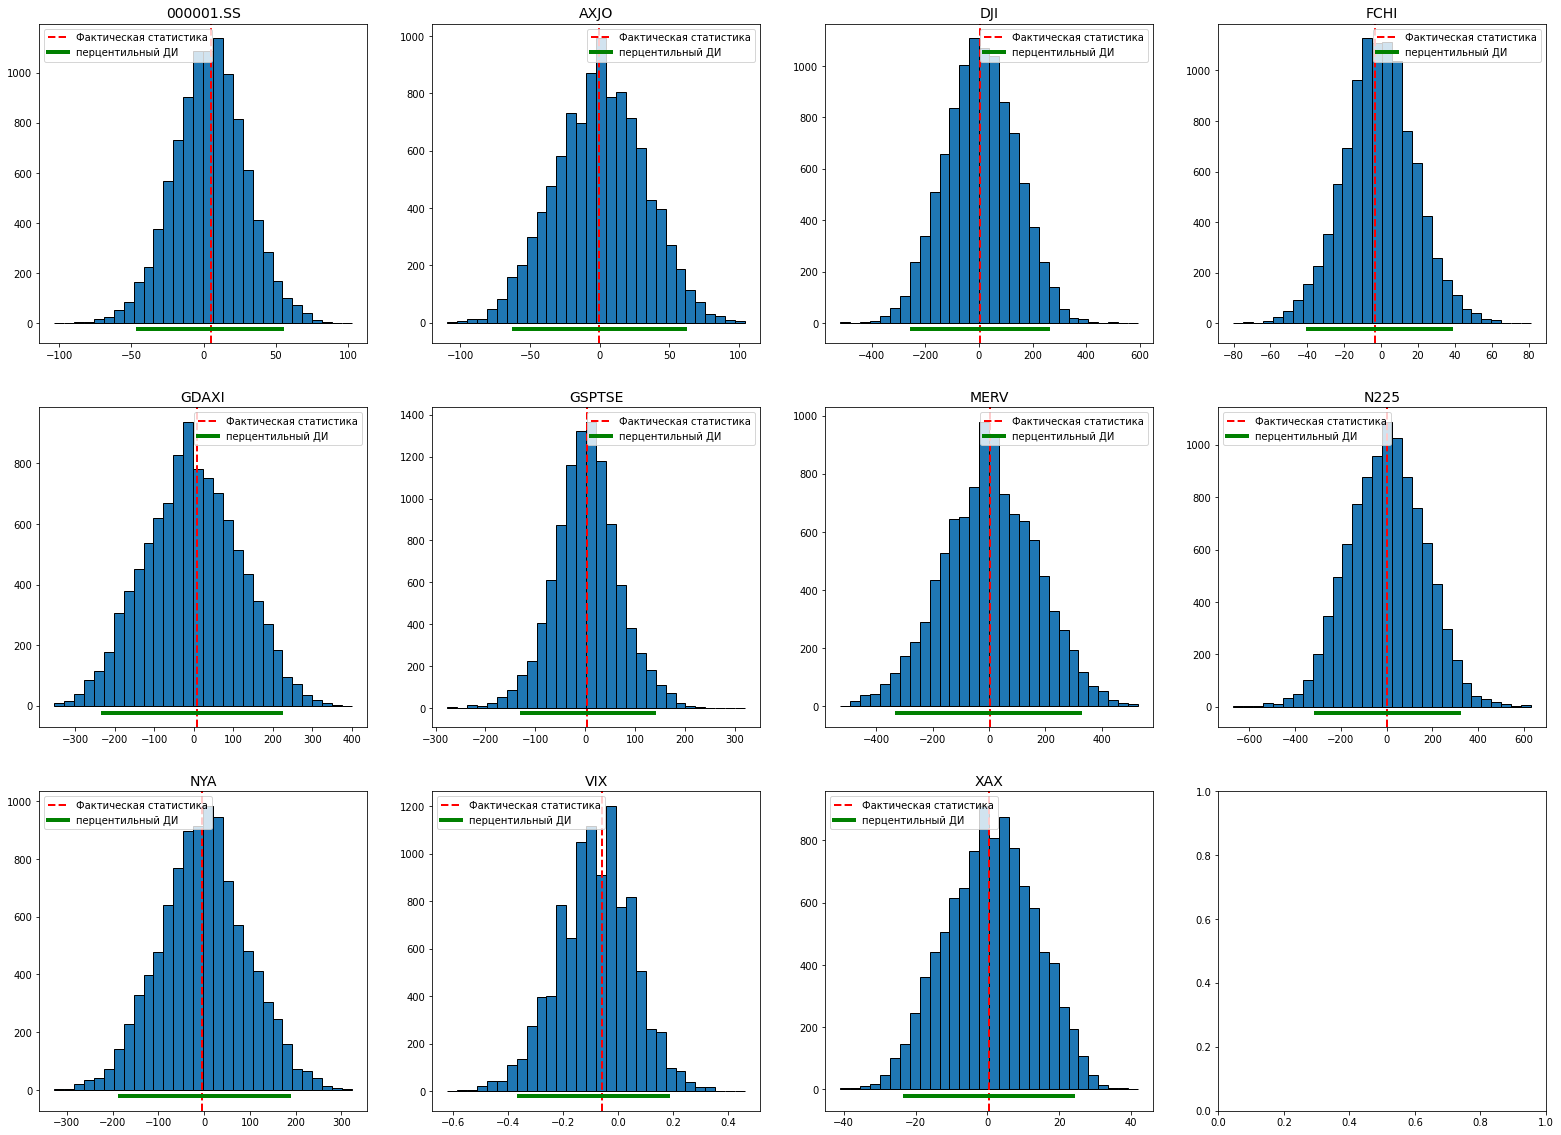

In [35]:
plot_bootstrap_mean(name)

### Таким образом по результатам проверки данной гипотезы мы обнаружили что во всех рассматриваемых биржах медианное значение цены открытия совпадает с ценой закрытия с доверительной вероятностью в 95% Следовательно это позволяет нам не отвергать гипотезу о равенстве медианных значений открытия и закрытия цен. В рамках бирж это может указывать на то что за сутки цена изменяется незначительно в рамках предыдущего дня и можно утверждать с 95 % вероятностью что он останется на прежнем уровне.

### 3. Выдвинем гипотезу о влиянии индексов друг на друга, будем предполагать, что изменение одного индекса влияет на изменение другого. Для этого построим матрицу корреляций цен закрытия бирж(в качестве признака возьмем цену закрытия).

In [36]:
result = pd.DataFrame({'date': main_dataframe[main_dataframe.ticker =='AXJO']['date'].values,
             'AXJO': main_dataframe[main_dataframe.ticker =='AXJO']['close'].values})
for i in name[name!='AXJO']:
    result = pd.merge(result,pd.DataFrame({'date': main_dataframe[main_dataframe.ticker ==i]['date'].values,
             i: main_dataframe[main_dataframe.ticker ==i]['close'].values}), how="inner", on='date')

In [37]:
result

date         AXJO    000001.SS           DJI         FCHI   
0    2002-12-02  3083.800049  1395.675049   8862.570312  3298.760010  \
1    2002-12-03  3072.600098  1408.843018   8742.929688  3222.260010   
2    2002-12-04  3027.199951  1414.453979   8737.849609  3199.840088   
3    2002-12-05  3040.500000  1404.880005   8623.280273  3158.040039   
4    2002-12-06  3027.300049  1405.525024   8645.769531  3185.770020   
...         ...          ...          ...           ...          ...   
3916 2022-01-21  7175.799805  3522.570068  34345.968750  7068.589844   
3917 2022-01-24  7139.500000  3524.110107  34364.500000  6787.790039   
3918 2022-01-25  6961.600098  3433.061279  34419.179688  6837.959961   
3919 2022-01-27  6838.299805  3394.250000  34160.781250  7023.799805   
3920 2022-01-28  6988.100098  3361.439941  34725.468750  6965.879883   

             GDAXI        GSPTSE          MERV          N225           NYA   
0      3380.199951   6665.299805    513.530029   9174.469727   5229.660156  \
1      3280.489990   6640.600098    517.830017   9205.110352   5164.629883   
2      3320.750000   6610.399902    515.070007   9006.730469   5155.430176   
3      3224.739990   6542.000000    517.210022   8917.570312   5104.790039   
4      3207.530029   6577.200195    517.030029   8863.259766   5131.850098   
...            ...           ...           ...           ...           ...   
3916  15603.879883  20621.400391  83622.476562  27522.259766  16470.724609   
3917  15011.129883  20571.300781  81004.406250  27588.369141  16413.970703   
3918  15123.870117  20673.970703  85180.429688  27131.339844  16423.851562   
3919  15524.269531  20555.949219  85968.757812  26170.300781  16161.337891   
3920  15318.950195  20741.800781  88269.828125  26717.339844  16397.859375   

            VIX          XAX  
0     27.459999   813.000000  
1     28.330000   812.640015  
2     28.920000   822.390015  
3     30.100000   821.460022  
4     28.879999   825.250000  
...         ...          ...  
3916  28.850000  3503.030518  
3917  33.070000  3496.550049  
3918  31.160000  3586.137695  
3919  31.670000  3559.209961  
3920  28.870001  3586.850098  

[3921 rows x 12 columns]

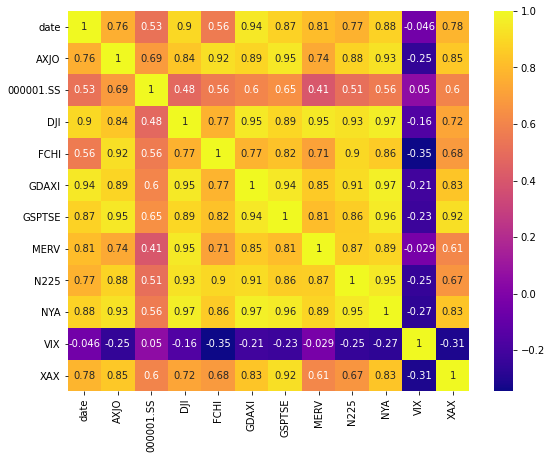

In [38]:
plt.figure(figsize=(9,7))
sns.heatmap(result.corr(), annot = True, cmap = 'plasma');

### По корреляционной матрице можем сразу заметить, что индес VIX(отражающий общую волатильность) имеет слабую  отрицательную корреляцию со всеми остальными индексами бирж. Также можем отметить что индекс Шанхайской фондовой биржи имеет умеренную силу связи с остальными индексами, что на общей картине корреляционной матрицы позволяет нам сделать предварительный вывод о том что данных индекс имеет слабое влияние на остальной рынок, или же рынок слабо влияет на данный индекс.

### Проведем уже проверенный бутсреп тест, чтобы проверить гипотезу о влиянии индексов бирж друг на друга. Будем считать что индексы бирж сильно влияют друг на друга если r(коэффициент корреляции пирсона) принимает значения больше 0,75.

### $H_0: r > 0.75$
### $H_1: r< 0.75$
### Уровень значимости $\alpha = 0.05$

### Идея реализации такая же что и для подсчета медианного значения, только мы попарно сравниваем два индекса и выводим для них корреляцию для которой расчитан интервал.

In [39]:
def bootstrap_hypothesis_test(data, alpha, B=2000):
    tickers = name.tolist()
    pairs = []
    correlation_intervals = []

    for i in range(len(tickers)):
        for j in range(i+1, len(tickers)):
            ticker1 = tickers[i]
            ticker2 = tickers[j]
            closing_index1 = data[ticker1].values
            closing_index2 = data[ticker2].values

            observed_corr, _ = pearsonr(closing_index1, closing_index2)

            bootstrap_correlations = []
            for _ in range(B):
                indices = np.random.randint(0, len(closing_index1), len(closing_index1))
                bootstrap_corr, _ = pearsonr(closing_index1[indices], closing_index2[indices])
                bootstrap_correlations.append(bootstrap_corr)

            lower = np.percentile(bootstrap_correlations, (alpha/2) * 100)
            upper = np.percentile(bootstrap_correlations, (1 - alpha/2) * 100)
            interval = (lower, upper)

            pairs.append((ticker1, ticker2))
            correlation_intervals.append(interval)

    result_df = pd.DataFrame({'Пара бирж': pairs, 'Корреляционный интервал': correlation_intervals})
    result_df['Попадение в интервал'] = result_df['Корреляционный интервал'].apply(lambda x: abs(x[1]) > 0.75)

    return result_df

In [40]:
corr_stock  = bootstrap_hypothesis_test(result,0.05)
corr_stock

Пара бирж                         Корреляционный интервал   
0     (000001.SS, AXJO)        (0.6753513852803136, 0.6962726033898446)  \
1      (000001.SS, DJI)        (0.4520734101372408, 0.4971744794195238)   
2     (000001.SS, FCHI)         (0.5456112555668785, 0.576545888068529)   
3    (000001.SS, GDAXI)         (0.583156882321093, 0.6256908066087263)   
4   (000001.SS, GSPTSE)        (0.6306263439981182, 0.6633172850164762)   
5     (000001.SS, MERV)        (0.38206592809563683, 0.429609830543449)   
6     (000001.SS, N225)        (0.4918373764390731, 0.5272933384107901)   
7      (000001.SS, NYA)        (0.5425649421714512, 0.5778651994593812)   
8      (000001.SS, VIX)     (0.023989878330611416, 0.07565833562793775)   
9      (000001.SS, XAX)         (0.5813049141438185, 0.613956035391015)   
10          (AXJO, DJI)        (0.8285553777009219, 0.8485685603851989)   
11         (AXJO, FCHI)        (0.9152182524907998, 0.9229420676943954)   
12        (AXJO, GDAXI)        (0.8783070752273242, 0.8941302548805883)   
13       (AXJO, GSPTSE)        (0.9428044212922961, 0.9504547738439988)   
14         (AXJO, MERV)        (0.7279765746582312, 0.7530019399449532)   
15         (AXJO, N225)        (0.8775055680171222, 0.8881348447083963)   
16          (AXJO, NYA)        (0.9227351273394073, 0.9317426518106975)   
17          (AXJO, VIX)     (-0.2791184253662299, -0.22645978344234605)   
18          (AXJO, XAX)        (0.8348836378447093, 0.8547111718928069)   
19          (DJI, FCHI)        (0.7533523946841817, 0.7833767762714805)   
20         (DJI, GDAXI)        (0.9470113937306929, 0.9514489431786172)   
21        (DJI, GSPTSE)        (0.8866635347037103, 0.8981280073289295)   
22          (DJI, MERV)        (0.9481400262755452, 0.9530124054660883)   
23          (DJI, N225)          (0.9252114175150402, 0.93433882091773)   
24           (DJI, NYA)         (0.966521519346692, 0.9702309640660732)   
25           (DJI, VIX)     (-0.18536751892662226, -0.1287669282933104)   
26           (DJI, XAX)         (0.7099995939567759, 0.736992188078003)   
27        (FCHI, GDAXI)        (0.7606060706182282, 0.7879999151928052)   
28       (FCHI, GSPTSE)         (0.812077483837883, 0.8320474553787454)   
29         (FCHI, MERV)        (0.6924839777207077, 0.7294868167801892)   
30         (FCHI, N225)        (0.8930295605082818, 0.9046228173795364)   
31          (FCHI, NYA)        (0.8482101315630457, 0.8661809730286124)   
32          (FCHI, VIX)      (-0.3696976802947098, -0.3218406239516528)   
33          (FCHI, XAX)        (0.6647215623478179, 0.6992878118326492)   
34      (GDAXI, GSPTSE)        (0.9409321425947141, 0.9471108417699434)   
35        (GDAXI, MERV)        (0.8451996810021071, 0.8566389895660779)   
36        (GDAXI, N225)        (0.9025388741809676, 0.9119966494238411)   
37         (GDAXI, NYA)        (0.9685132182402953, 0.9710110863414866)   
38         (GDAXI, VIX)    (-0.23740497603398228, -0.18823392980256096)   
39         (GDAXI, XAX)        (0.8244605865737099, 0.8418883811504909)   
40       (GSPTSE, MERV)        (0.7996523597645362, 0.8184201338382697)   
41       (GSPTSE, N225)        (0.8529169426208095, 0.8672274358681662)   
42        (GSPTSE, NYA)         (0.9545291863501483, 0.959569441650832)   
43        (GSPTSE, VIX)     (-0.2512332391940394, -0.19984936341147416)   
44        (GSPTSE, XAX)         (0.9112342256784969, 0.923643913886611)   
45         (MERV, N225)        (0.8614828497757316, 0.8736245063935394)   
46          (MERV, NYA)        (0.8802693799252462, 0.8909956832522484)   
47          (MERV, VIX)  (-0.05387707710534344, -0.0041765975554792605)   
48          (MERV, XAX)         (0.586260355124819, 0.6253339712682309)   
49          (N225, NYA)        (0.9449923709583888, 0.9509254127996716)   
50          (N225, VIX)     (-0.2755194057301383, -0.21747697596666538)   
51          (N225, XAX)          (0.6534765100328495, 0.68464435824674)   
52           (NYA, VIX)     (-0.2967411

### Выведем список пар бирж для которых крайнее значение 0.75 попало в интервал.

In [56]:
true_corr = corr_stock[corr_stock['Попадение в интервал']==True]
true_corr

Пара бирж                   Корреляционный интервал   
10      (AXJO, DJI)  (0.8285553777009219, 0.8485685603851989)  \
11     (AXJO, FCHI)  (0.9152182524907998, 0.9229420676943954)   
12    (AXJO, GDAXI)  (0.8783070752273242, 0.8941302548805883)   
13   (AXJO, GSPTSE)  (0.9428044212922961, 0.9504547738439988)   
14     (AXJO, MERV)  (0.7279765746582312, 0.7530019399449532)   
15     (AXJO, N225)  (0.8775055680171222, 0.8881348447083963)   
16      (AXJO, NYA)  (0.9227351273394073, 0.9317426518106975)   
18      (AXJO, XAX)  (0.8348836378447093, 0.8547111718928069)   
19      (DJI, FCHI)  (0.7533523946841817, 0.7833767762714805)   
20     (DJI, GDAXI)  (0.9470113937306929, 0.9514489431786172)   
21    (DJI, GSPTSE)  (0.8866635347037103, 0.8981280073289295)   
22      (DJI, MERV)  (0.9481400262755452, 0.9530124054660883)   
23      (DJI, N225)    (0.9252114175150402, 0.93433882091773)   
24       (DJI, NYA)   (0.966521519346692, 0.9702309640660732)   
27    (FCHI, GDAXI)  (0.7606060706182282, 0.7879999151928052)   
28   (FCHI, GSPTSE)   (0.812077483837883, 0.8320474553787454)   
30     (FCHI, N225)  (0.8930295605082818, 0.9046228173795364)   
31      (FCHI, NYA)  (0.8482101315630457, 0.8661809730286124)   
34  (GDAXI, GSPTSE)  (0.9409321425947141, 0.9471108417699434)   
35    (GDAXI, MERV)  (0.8451996810021071, 0.8566389895660779)   
36    (GDAXI, N225)  (0.9025388741809676, 0.9119966494238411)   
37     (GDAXI, NYA)  (0.9685132182402953, 0.9710110863414866)   
39     (GDAXI, XAX)  (0.8244605865737099, 0.8418883811504909)   
40   (GSPTSE, MERV)  (0.7996523597645362, 0.8184201338382697)   
41   (GSPTSE, N225)  (0.8529169426208095, 0.8672274358681662)   
42    (GSPTSE, NYA)   (0.9545291863501483, 0.959569441650832)   
44    (GSPTSE, XAX)   (0.9112342256784969, 0.923643913886611)   
45     (MERV, N225)  (0.8614828497757316, 0.8736245063935394)   
46      (MERV, NYA)  (0.8802693799252462, 0.8909956832522484)   
49      (N225, NYA)  (0.9449923709583888, 0.9509254127996716)   
53       (NYA, XAX)  (0.8251141722548079, 0.8428771280969181)   

    Попадение в интервал  
10                  True  
11                  True  
12                  True  
13                  True  
14                  True  
15                  True  
16                  True  
18                  True  
19                  True  
20                  True  
21                  True  
22                  True  
23                  True  
24                  True  
27                  True  
28                  True  
30                  True  
31                  True  
34                  True  
35                  True  
36                  True  
37                  True  
39                  True  
40                  True  
41                  True  
42                  True  
44                  True  
45                  True  
46                  True  
49                  True  
53                  True

In [57]:
true_corr.head(12)

Пара бирж                   Корреляционный интервал   
10     (AXJO, DJI)  (0.8285553777009219, 0.8485685603851989)  \
11    (AXJO, FCHI)  (0.9152182524907998, 0.9229420676943954)   
12   (AXJO, GDAXI)  (0.8783070752273242, 0.8941302548805883)   
13  (AXJO, GSPTSE)  (0.9428044212922961, 0.9504547738439988)   
14    (AXJO, MERV)  (0.7279765746582312, 0.7530019399449532)   
15    (AXJO, N225)  (0.8775055680171222, 0.8881348447083963)   
16     (AXJO, NYA)  (0.9227351273394073, 0.9317426518106975)   
18     (AXJO, XAX)  (0.8348836378447093, 0.8547111718928069)   
19     (DJI, FCHI)  (0.7533523946841817, 0.7833767762714805)   
20    (DJI, GDAXI)  (0.9470113937306929, 0.9514489431786172)   
21   (DJI, GSPTSE)  (0.8866635347037103, 0.8981280073289295)   
22     (DJI, MERV)  (0.9481400262755452, 0.9530124054660883)   

    Попадение в интервал  
10                  True  
11                  True  
12                  True  
13                  True  
14                  True  
15                  True  
16                  True  
18                  True  
19                  True  
20                  True  
21                  True  
22                  True

### Так как получилось большое количество пар индексов где корреляция выше 0.75, визуализацию проводить не будем, лишь удостоверимся на одной паре бирж, что мы корректно провели бутсреп тест.

In [58]:
closing_index1 = result['AXJO'].values
closing_index2 = result['XAX'].values
pairs = []
correlation_intervals = []

observed_corr, _ = pearsonr(closing_index1, closing_index2)

bootstrap_correlations = []
for _ in range(2000):
    indices = np.random.randint(0, len(closing_index1), len(closing_index1))
    bootstrap_corr, _ = pearsonr(closing_index1[indices], closing_index2[indices])
    bootstrap_correlations.append(bootstrap_corr)

    lower = np.percentile(bootstrap_correlations, (alpha/2) * 100)
    upper = np.percentile(bootstrap_correlations, (1 - alpha/2) * 100)
    interval = (lower, upper)

    correlation_intervals.append(interval)

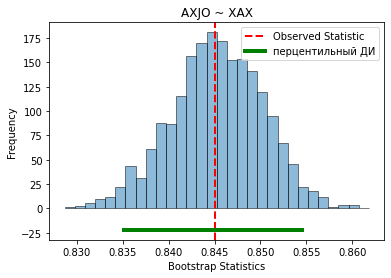

In [59]:
plt.hist(bootstrap_correlations, bins=30, edgecolor='k', alpha=0.5)
plt.axvline(observed_corr, color='red', linestyle='dashed', linewidth=2, label='Observed Statistic')
plt.xlabel('Bootstrap Statistics')
plt.plot(interval, [-11*2, -11*2], label='перцентильный ДИ', color = 'g', linewidth=4)
plt.ylabel('Frequency')
plt.title('AXJO ~ XAX')
plt.legend()
plt.show()

### После проведения гипотезы, нам удалось найти биржи , цены закрытия которых сильно связаны между собой. Список приведен ниже в виде таблицы

In [60]:
true_corr

Пара бирж                   Корреляционный интервал   
10      (AXJO, DJI)  (0.8285553777009219, 0.8485685603851989)  \
11     (AXJO, FCHI)  (0.9152182524907998, 0.9229420676943954)   
12    (AXJO, GDAXI)  (0.8783070752273242, 0.8941302548805883)   
13   (AXJO, GSPTSE)  (0.9428044212922961, 0.9504547738439988)   
14     (AXJO, MERV)  (0.7279765746582312, 0.7530019399449532)   
15     (AXJO, N225)  (0.8775055680171222, 0.8881348447083963)   
16      (AXJO, NYA)  (0.9227351273394073, 0.9317426518106975)   
18      (AXJO, XAX)  (0.8348836378447093, 0.8547111718928069)   
19      (DJI, FCHI)  (0.7533523946841817, 0.7833767762714805)   
20     (DJI, GDAXI)  (0.9470113937306929, 0.9514489431786172)   
21    (DJI, GSPTSE)  (0.8866635347037103, 0.8981280073289295)   
22      (DJI, MERV)  (0.9481400262755452, 0.9530124054660883)   
23      (DJI, N225)    (0.9252114175150402, 0.93433882091773)   
24       (DJI, NYA)   (0.966521519346692, 0.9702309640660732)   
27    (FCHI, GDAXI)  (0.7606060706182282, 0.7879999151928052)   
28   (FCHI, GSPTSE)   (0.812077483837883, 0.8320474553787454)   
30     (FCHI, N225)  (0.8930295605082818, 0.9046228173795364)   
31      (FCHI, NYA)  (0.8482101315630457, 0.8661809730286124)   
34  (GDAXI, GSPTSE)  (0.9409321425947141, 0.9471108417699434)   
35    (GDAXI, MERV)  (0.8451996810021071, 0.8566389895660779)   
36    (GDAXI, N225)  (0.9025388741809676, 0.9119966494238411)   
37     (GDAXI, NYA)  (0.9685132182402953, 0.9710110863414866)   
39     (GDAXI, XAX)  (0.8244605865737099, 0.8418883811504909)   
40   (GSPTSE, MERV)  (0.7996523597645362, 0.8184201338382697)   
41   (GSPTSE, N225)  (0.8529169426208095, 0.8672274358681662)   
42    (GSPTSE, NYA)   (0.9545291863501483, 0.959569441650832)   
44    (GSPTSE, XAX)   (0.9112342256784969, 0.923643913886611)   
45     (MERV, N225)  (0.8614828497757316, 0.8736245063935394)   
46      (MERV, NYA)  (0.8802693799252462, 0.8909956832522484)   
49      (N225, NYA)  (0.9449923709583888, 0.9509254127996716)   
53       (NYA, XAX)  (0.8251141722548079, 0.8428771280969181)   

    Попадение в интервал  
10                  True  
11                  True  
12                  True  
13                  True  
14                  True  
15                  True  
16                  True  
18                  True  
19                  True  
20                  True  
21                  True  
22                  True  
23                  True  
24                  True  
27                  True  
28                  True  
30                  True  
31                  True  
34                  True  
35                  True  
36                  True  
37                  True  
39                  True  
40                  True  
41                  True  
42                  True  
44                  True  
45                  True  
46                  True  
49                  True  
53                  True

### Построим граф взаимодействия различных бирж, для этого на карте укажем связи между городами где располагаются биржи.

In [61]:
abbreviation['city'] = ['Shanghai','Sydney','New York','Paris','Berlin','Ottawa','Buenos Aires','Tokyo',
                         'New York','New York','New York']

In [62]:
abbreviation

Индекс                                       Расшифровка          city
0   000001.SS                         Шанхайская фондовая биржа      Shanghai
1        AXJO                      Австралийская фондовая биржа        Sydney
2         DJI  Индекс Доу Джонсона(Американская фондовая биржа)      New York
3        FCHI                        Французская фондовая биржа         Paris
4       GDAXI                           Немецкая фондовая биржа        Berlin
5      GSPTSE                          Канадская фондовая биржа        Ottawa
6        MERV                       Аргентинская фондовая биржа  Buenos Aires
7        N225                           Японская фондовая биржа         Tokyo
8         NYA                        Нью-Йорская фондовая биржа      New York
9         VIX    (Индекс волатильности)Чикагская фондовая биржа      New York
10        XAX                       Американская фондовая биржа      New York

### Воспользуемся датасетом с геолокацией городов мира и отберем нужные нам города где располагаются биржжи

In [63]:
location = pd.read_csv('C:/Users/Lenovo/Курсовая/Локация/worldcities.csv')
location.head()

city   city_ascii      lat       lng        country iso2 iso3   
0        Tokyo        Tokyo  35.6850  139.7514          Japan   JP  JPN  \
1     New York     New York  40.6943  -73.9249  United States   US  USA   
2  Mexico City  Mexico City  19.4424  -99.1310         Mexico   MX  MEX   
3       Mumbai       Mumbai  19.0170   72.8570          India   IN  IND   
4    São Paulo    Sao Paulo -23.5587  -46.6250         Brazil   BR  BRA   

         admin_name  capital  population          id  
0             Tōkyō  primary  35676000.0  1392685764  
1          New York      NaN  19354922.0  1840034016  
2  Ciudad de México  primary  19028000.0  1484247881  
3       Mahārāshtra    admin  18978000.0  1356226629  
4         São Paulo    admin  18845000.0  1076532519

In [64]:
merged = pd.merge(abbreviation,location, on ='city', how='inner')

### Зададим координаты городов

In [65]:
cord = [(31.2165, 121.4365),
 (-33.92, 151.1852),
 (40.6943, -73.9249),
 (40.6943, -74.2249),
 (40.6943, -73.6249),
 (40.6943, -73.1249),
 (48.8667, 2.3333),
 (52.5218, 13.4015),
 (45.4167, -75.7),
 (-34.6025, -58.3975),
 (35.685, 139.7514)]

### Воспользуемся результатом объединения попарного сравнения бирж и их координат.

In [67]:
df4 = pd.read_csv('Попарное сравнение.csv')
df4 = df4.drop('Unnamed: 0', axis=1)
df4

c       d                cord_x                cord_y
0     AXJO     DJI    (-33.92, 151.1852)   (40.6943, -73.9249)
1     AXJO    FCHI    (-33.92, 151.1852)     (48.8667, 2.3333)
2      DJI    FCHI   (40.6943, -73.9249)     (48.8667, 2.3333)
3     AXJO   GDAXI    (-33.92, 151.1852)    (52.5218, 13.4015)
4      DJI   GDAXI   (40.6943, -73.9249)    (52.5218, 13.4015)
5     FCHI   GDAXI     (48.8667, 2.3333)    (52.5218, 13.4015)
6     AXJO  GSPTSE    (-33.92, 151.1852)      (45.4167, -75.7)
7      DJI  GSPTSE   (40.6943, -73.9249)      (45.4167, -75.7)
8     FCHI  GSPTSE     (48.8667, 2.3333)      (45.4167, -75.7)
9    GDAXI  GSPTSE    (52.5218, 13.4015)      (45.4167, -75.7)
10    AXJO    MERV    (-33.92, 151.1852)  (-34.6025, -58.3975)
11     DJI    MERV   (40.6943, -73.9249)  (-34.6025, -58.3975)
12   GDAXI    MERV    (52.5218, 13.4015)  (-34.6025, -58.3975)
13  GSPTSE    MERV      (45.4167, -75.7)  (-34.6025, -58.3975)
14    AXJO    N225    (-33.92, 151.1852)    (35.685, 139.7514)
15     DJI    N225   (40.6943, -73.9249)    (35.685, 139.7514)
16    FCHI    N225     (48.8667, 2.3333)    (35.685, 139.7514)
17   GDAXI    N225    (52.5218, 13.4015)    (35.685, 139.7514)
18  GSPTSE    N225      (45.4167, -75.7)    (35.685, 139.7514)
19    MERV    N225  (-34.6025, -58.3975)    (35.685, 139.7514)
20    AXJO     NYA    (-33.92, 151.1852)   (40.6943, -74.2249)
21     DJI     NYA   (40.6943, -73.9249)   (40.6943, -74.2249)
22    FCHI     NYA     (48.8667, 2.3333)   (40.6943, -74.2249)
23   GDAXI     NYA    (52.5218, 13.4015)   (40.6943, -74.2249)
24  GSPTSE     NYA      (45.4167, -75.7)   (40.6943, -74.2249)
25    MERV     NYA  (-34.6025, -58.3975)   (40.6943, -74.2249)
26    N225     NYA    (35.685, 139.7514)   (40.6943, -74.2249)
27    AXJO     XAX    (-33.92, 151.1852)   (40.6943, -73.1249)
28   GDAXI     XAX    (52.5218, 13.4015)   (40.6943, -73.1249)
29  GSPTSE     XAX      (45.4167, -75.7)   (40.6943, -73.1249)
30     NYA     XAX   (40.6943, -74.2249)   (40.6943, -73.1249)

### Настраиваем отображение карты, добавим выделение страны, а также постиоим граф связей бирж

In [68]:
from ast import literal_eval

In [69]:
x = [literal_eval(df4.cord_x.values[i]) for i in range(len(df4.cord_x.values))]

In [70]:
y = [literal_eval(df4.cord_y.values[i]) for i in range(len(df4.cord_y.values))]

In [71]:
pair_c = list(zip(x, y))

In [72]:
import json
with open('C:/Users/Lenovo/Birzha/Локация/countries.geojson') as handle:
    country_geo = json.loads(handle.read())

In [97]:
Country = ['Japan','Argentina','France','Australia','Canada','Germany','United States of America']

In [98]:
country = []
for i in country_geo['features']:
    if i['properties']['ADMIN'] in Country:
        country.append(i)

In [99]:
import folium

In [123]:
m = folium.Map(tiles = 'openstreetmap')
for i in range(len(cord)):
    folium.Marker(
    cord[i], tooltip=merged['Индекс'].unique()[i]
).add_to(m)
    
for pair in pair_c:
    folium.PolyLine(pair).add_to(m)
    
for i in country:
    folium.GeoJson(i,
               name=i['properties']['ADMIN']).add_to(m)

folium.TileLayer('stamenterrain').add_to(m)

### Полученный граф связей на карте мира:

In [124]:
m

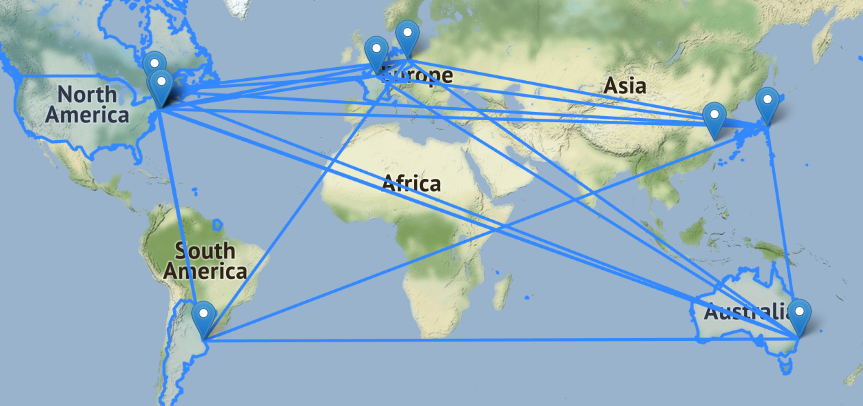

In [82]:
Hyp1

Биржа        p_value              Вывод  Среднее в больших объемах   
0  000001.SS   0.000000e+00     H0 отвергается                3098.345364  \
1       AXJO   1.000000e+00  H0 не отвергается                5661.240455   
2        DJI   2.391292e-34     H0 отвергается               18794.556283   
3       FCHI   1.000000e+00  H0 не отвергается                4265.540495   
4      GDAXI   1.000000e+00  H0 не отвергается                7258.524085   
5     GSPTSE  2.309905e-110     H0 отвергается               14191.184873   
6       N225   1.000000e+00  H0 не отвергается               13823.643794   
7        NYA   5.136630e-09     H0 отвергается                9796.108837   
8        XAX   1.000000e+00  H0 не отвергается                1500.014405   

   Среднее в маленьких объемах  
0                  2238.740611  
1                  6732.737589  
2                 14116.611630  
3                  4940.184969  
4                  9512.983763  
5                 12185.348171  
6                 17443.383077  
7                  9397.636617  
8                  1937.048605

In [83]:
Hyp2

Биржа         Значимость  Фактическое значение статистики
0   000001.SS  H0 не отвергается                         5.140503
1        AXJO  H0 не отвергается                        -0.500000
2         DJI  H0 не отвергается                         4.639648
3        FCHI  H0 не отвергается                        -3.010010
4       GDAXI  H0 не отвергается                         7.560059
5      GSPTSE  H0 не отвергается                         4.099609
6        MERV  H0 не отвергается                         3.800049
7        N225  H0 не отвергается                         3.314941
8         NYA  H0 не отвергается                        -3.669922
9         VIX  H0 не отвергается                        -0.060001
10        XAX  H0 не отвергается                         0.379883

In [133]:
con = pd.merge(Hyp1.iloc[:,[0,2]],Hyp2.iloc[:,[0,1]], on='Биржа', how='right')

In [134]:
con = con.rename(columns={'Вывод':'Гипотеза об объеме торгов','Значимость':'Гипотеза о равенстве медианы'})

In [135]:
con['Гипотеза о взаимодействии бирж'] = [0,8,7,6,8,8,6,7,8,0,4]

### Выводы:

### Ниже приведена таблица с гипотезами по порядку и их выводами, в третьей гипотезе указано количество бирж с которыми взаимодействует конкретная биржа.

In [136]:
con

Биржа Гипотеза об объеме торгов Гипотеза о равенстве медианы   
0   000001.SS            H0 отвергается            H0 не отвергается  \
1        AXJO         H0 не отвергается            H0 не отвергается   
2         DJI            H0 отвергается            H0 не отвергается   
3        FCHI         H0 не отвергается            H0 не отвергается   
4       GDAXI         H0 не отвергается            H0 не отвергается   
5      GSPTSE            H0 отвергается            H0 не отвергается   
6        MERV                       NaN            H0 не отвергается   
7        N225         H0 не отвергается            H0 не отвергается   
8         NYA            H0 отвергается            H0 не отвергается   
9         VIX                       NaN            H0 не отвергается   
10        XAX         H0 не отвергается            H0 не отвергается   

    Гипотеза о взаимодействии бирж  
0                                0  
1                                8  
2                                7  
3                                6  
4                                8  
5                                8  
6                                6  
7                                7  
8                                8  
9                                0  
10                               4

### Проделав данную работу, мы смогли провести анализ и предобработку датасета с дневными данными об индексах мировых фондовых бирж. Распределения признаков индексов бирж тяжело отнести к конкретному распределению и оценить параметрическими методами. 

### Для проверки гипотез на больших выборках, с ненормально и непараметрически распределенными величинами нужно пользоваться непараметрическими тестами и критериями, в частности в проделанной работе был выбран бутстреп-тест, который позволил нам смоделировать поведение наших проверяемых статистик.
###  В ходе работы проверили три гипотезы:
***Гипотеза о влиянии объема торгов на бирже*** позволила нам сделать вывод о том что не было обнаружено различий в средних ценах при больших и маленьких объемах торгов, что может послужить отличным инструментом для принятия решений на тех биржах, где было выялвено влияние объема торгов на цену закрытия, и позволит отследить объемы сделок за конкретный день и сделать прогноз повысится цена или понизится в конце дня. \
***Гипотеза о равенстве медианных значений цен закрытия и открытия*** подтвердилась практически для всех бирж.\
***Гипотеза о влиянии цен закрытия бирж друг на друга*** также позволила нам взглянуть на биржи которые имеют сильную зависимость друг от друга. Данная гипотеза помогает выявить взаимосвязи между биржами находящимися на разных концах земли. Это поможет принимать взвешанные решения о торгах на фондовых рынках,  а также учесть как поведет себя конкретная биржа, если пройдут изменения на зависящих от нее других бирж.